https://www.geeksforgeeks.org/deletion-in-binary-search-tree/?ref=next_article

### Deletion in Binary Search Tree

Given a BST, the task is to delete a node in this BST, which can be broken down into 3 scenarios:
1. Delete a Leaf Node in BST 
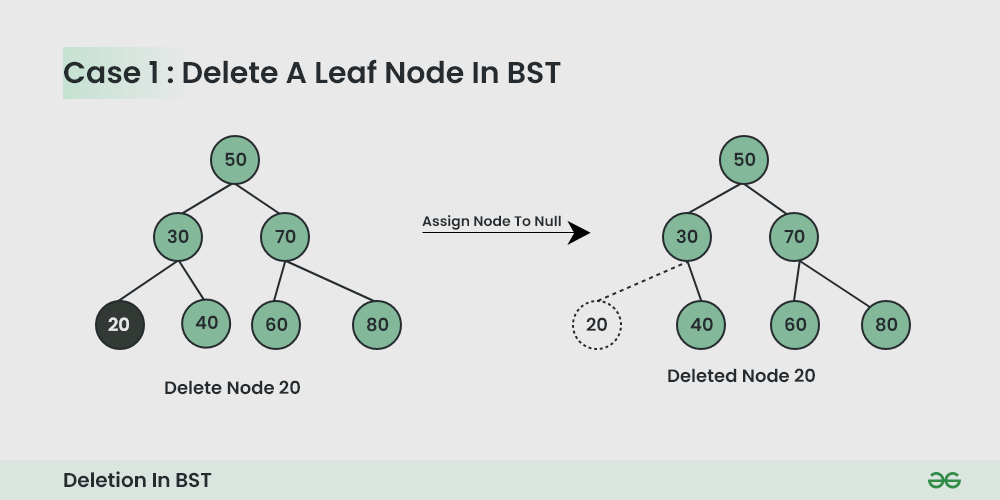

2. Delete a node with a Single Child in BST
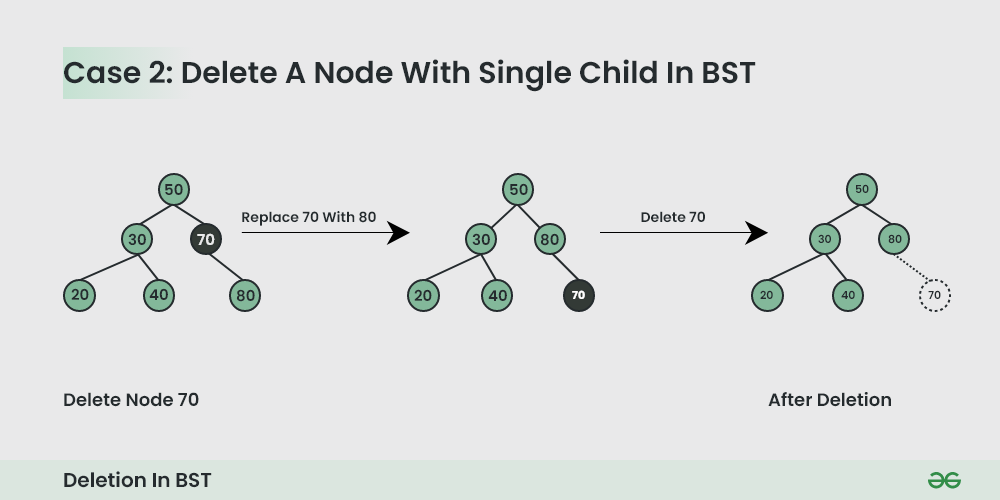

3. Delete a Node with Both Children in BST 
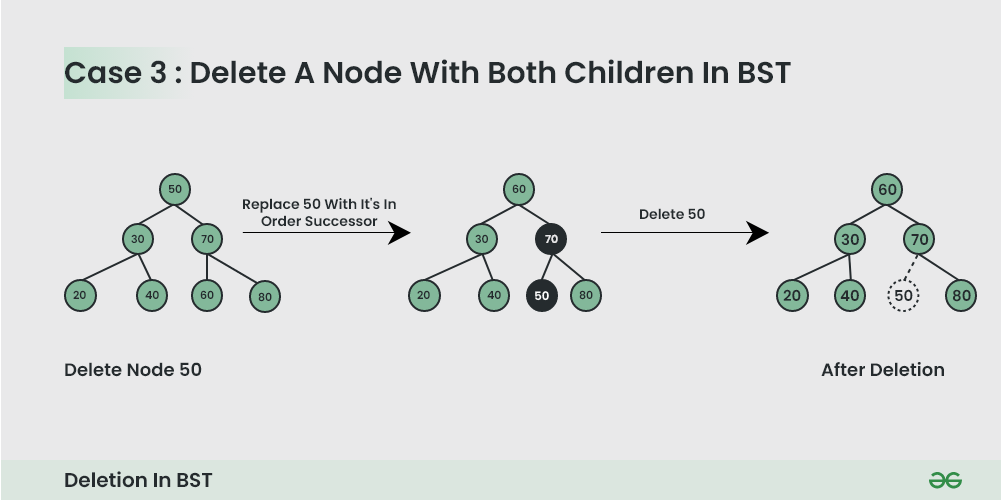



#### Recursive Implementation of Deletion operation in a BST:


In [8]:
class Node:
    def __init__(self, key):
        self.key = key 
        self.left = None 
        self.right = None 

def getSuccessor(curr):
    curr = curr.right 
    while curr is not None and curr.left is not None:
        curr = curr.left 
    return curr

def delNode(root, x):
    if root is None:
        return root 
    if root.key > x:
        root.left = delNode(root.left, x)
    elif root.key < x:
        root.right = delNode(root.right, x)
    else: # root matches with the give key 
        # case where root has no children or only right child 
        if root.left is None:
            return root.right
        # when root has only left child 
        if root.right is None:
            return root.left 
        # when both children are present
        succ = getSuccessor(root)
        root.key = succ.key 
        root.right = delNode(root.right, succ.key)
    return root

def inOrder(root):
    if root:
        inOrder(root.left)
        print (root.key, end=' ')
        inOrder(root.right)


root = Node(10)
root.left = Node(5)
root.right = Node(15)
root.right.left = Node(12)
root.right.right = Node(18)
inOrder(root)
x = 15
print()
root = delNode(root, x)
inOrder(root)



5 10 12 15 18 
5 10 12 18 

OPtimized Recursive Delete in BST 

### https://www.geeksforgeeks.org/optimized-recursive-delete-in-bst/



In [11]:
class Node:
    def __init__(self, key):
        self.key = key 
        self.left = None
        self.right = None 

def delNode(root, k):
    if root is None:
        return root 
    
    if k < root.key:
        root.left = delNode(root.left, k)
    elif k > root.key:
        root.right = delNode(root.right, k)
    if root.left is None:
        return root.right
    elif root.right is None:
        return root.left 
    
    succ_parent = root 
    succ = root.right
    while succ.left is not None:
        succ_parent = succ
        succ = succ.left
    root.key = succ.key 

    if succ_parent.left == succ:
        succ_parent.left = succ.right 
    else:
        succ_parent.right = succ.right
    return root   

# Utility function to do inorder traversal
def inorder(root):
    if root is not None:
        inorder(root.left)
        print(root.key, end=" ")
        inorder(root.right)

# Driver code
if __name__ == "__main__":
    root = Node(10)
    root.left = Node(5)
    root.right = Node(15)
    root.right.left = Node(12)
    root.right.right = Node(18)
    x = 15
    inorder(root)
    print()
    root = delNode(root, x)
    inorder(root)
    print()

5 10 12 15 18 
5 12 18 


### Iterative Approach to deleting a key / node from a BST 

ref: https://www.geeksforgeeks.org/binary-search-tree-set-3-iterative-delete/

Three cases:
Case 1: Node to be deleted is a leaf node. Directly delete a node from the tree
Case 2: Node to be deleted is an internal node with two children. 
    Copy the contents of the inorder successor of the node to be deleted and delete the inorder successor.

    The inorder successor can be found by finding the minimum element in the right subtree of the node. inorderSuccessor(10) = 11.

             10                              11
           /     \         delete(10)      /     \
          7       15       --------->    7        15 
         /  \    /  \                   /  \        \ 
        5    8  11   18                5    8        18

case 3: Node to be deleted is an internal node with one child. For this case, delete the node and move its child up to take its place. 

              10                              10
           /     \         delete(15)      /     \
          7       15       --------->    7       11 
         /  \    /                      /  \      
        5    8  11                     5    8